# Mechanical Power
Gray et al. (2020)

An energy-based approach to quantifying the mechanical demands of overground, constant velocity and/or intermittent running patterns is presented. The total work done ($W_{total}$) is determined from the <b>sum</b> of the four sub components: work done to accelerate the centre of mass horizontally ($W_{hor}$), vertically ($W_{vert}$), to overcome air resistance ($W_{air})$ and to swing the limbs ($W_{limbs}$)
$$W_{total} = W_{hor} + W_{vert} + W_{air} + W_{limbs}$$

This notebook implements the approach in the programming language python.

## Importing Data and Libraries

In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv("20200129_185931_1_Jessica_challenor_samples.csv")
df

,Uhrzeit,Uhrzeit.1,HF [S/min],Geschwindigkeit [km/h],Distanz [m],Beschleunigung [m/s²],Schrittfrequenz
0,00:00:00.0,18:14:47.0,106.0,0.00,0.0,0.00,0
1,00:00:00.1,18:14:47.1,106.0,0.00,0.0,0.00,0
2,00:00:00.2,18:14:47.2,106.0,0.00,0.0,0.00,0
3,00:00:00.3,18:14:47.3,106.0,0.00,0.0,0.00,0
4,00:00:00.4,18:14:47.4,106.0,0.00,0.0,0.00,0
...,...,...,...,...,...,...,...
61618,01:42:41.8,19:57:28.8,NaN,4.98,7488.6,0.89,52
61619,01:42:41.9,19:57:28.9,NaN,4.81,7488.7,0.67,52
61620,01:42:42.0,19:57:29.0,NaN,4.55,7488.8,0.45,43
61621,01:42:42.1,19:57:29.1,NaN,4.27,7488.9,0.26,43


In [26]:
# adding v (velocity) collumn
df['v']=df['Geschwindigkeit [km/h]']/3.6
t_i = np.arange(0, len(df)/10, 0.1)
v = df.v

## COM & Limb kinematics
The movement of the centre of mass (COM) is tightly coupled to running speed and can be imagined as a bouncing ball. Considering one step the COM is the lowest during mid-support and the highest during mid-flight. This vertical displacement ($ \Delta~h~in~m$) of the COM can roughly estimated using the following equation:

$ \Delta h = - 0.008 + 0.004 * v $

where $v$ has the unit $\frac {m}{s}$. The calculation is based on a linear correlation between running speed and vertical COM displacement ($r^2 = 0.444,~p = 0.034,~n = 90$).

Furthermore the stride frequency ($f~in~Hz$) and the duty factor ($d~in~\%~in~decimal~form$, the duty factor is the percentage of the stride cycle in which a single limb is in the support phase) need to be calculated. For this purpose two equations are proposed by Gray et al. (2020):

$f = 0.026 * v^2 - 0.111 * v + 1.398$

$d = 0.004 * v^2 - 0.061 * v + 0.50 $

All three equations are implemented in the following section of code. For the sake of this demonstration a new array containing speeds from 0 - 10 $\frac {m}{s}$ is created and used for the calculations. This enables us to gain a rough understanding on how $ \Delta~h$, $f$ and $d$ behave in different velocities.


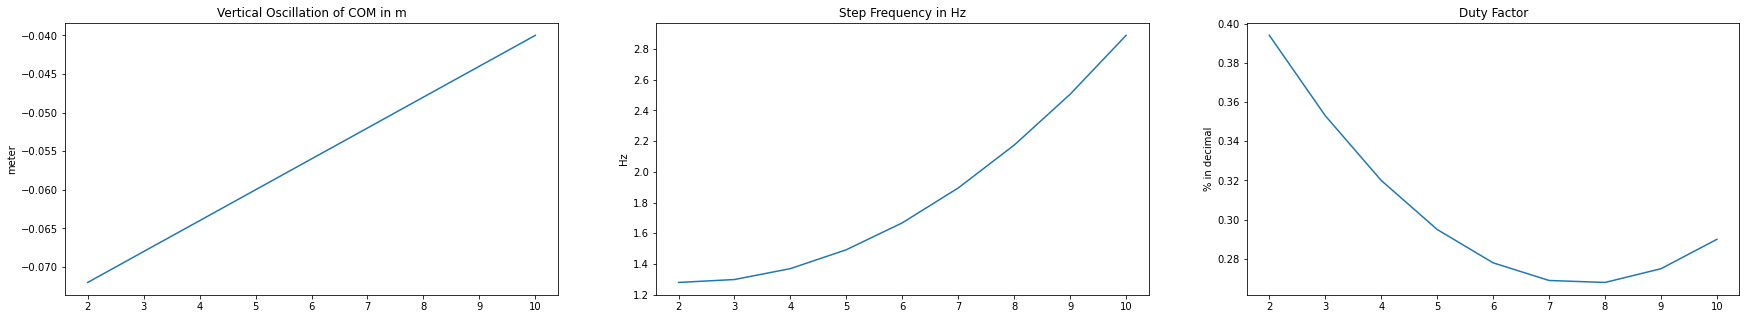

In [27]:
#time = np.arange(0,6,0.01)
#v_ex = 9.16 * (1 - np.exp(-time/1.4))
#plt.plot(time, v_ex) 
v_ex = np.arange(2,11,1)
#v_ex = 10
dh =  -0.080 + 0.004 * v_ex                                                     # report different equation than in cited paper, -0.080 vs - 0.008
f = 0.026 * v_ex**2 - 0.111 * v_ex + 1.398
d = 0.004 * v_ex**2 - 0.061 * v_ex + 0.5

fig = plt.figure(figsize=(30, 5))
plt.subplot(1,3,1)
plt.title('Vertical Oscillation of COM in m')
plt.ylabel("meter")
plt.plot(v_ex, dh)

plt.subplot(1,3,2)
plt.title('Step Frequency in Hz')
plt.ylabel('Hz')
plt.plot(v_ex, f)

plt.subplot(1,3,3)
plt.title('Duty Factor')
plt.ylabel('% in decimal')
plt.plot(v_ex, d)

The graph on the right shows the linear relationship between the vertical oscillation of the COM and the running speed. Higher running speed result in larger vertical oscillations of the COM. The stride frequency initially decreases up to about $2 \frac {m}{s}$, therefore the increases in running speed must be related to increased step length. Afterwards the stride frequency increases almost exponentially with increased running speed. Lastly, the duty factor decreases up to about $7.5 \frac {m}{s}$ and afterwards increases. 

---

## External Work
The external work performed can be subdivided into the horizontal work needed to accelerate and decelerate the COM ($W_{hor}$), the vertical work needed to oscillate the COM ($W_{vert}$) and the work needed to overcome the air resistance ($W_{air}$). The overall external work is the sum of the three subcompartments:

$W_{ext} = W_{hor} + W_{vert} + W_{air}$

The calculation of each subdepartment is explained in the following.

### Calculating Horizontal Work
$W_{hor}$ is the change of horizontal kinetic energy ($k_{en}$) according to the *Work-Energy-Theorem*. Kinetic energy can be calculated using the following equation:

$k_{en} = \frac{1}{2} * m * v^2$

Mass is simply a scaling factor and can therefore be removed if $k_{en}$ is expressed per kg. Consequently, as $W_{hor}$ is the change of horizontal $k_{en}$ the following equation can be used:

$W_{hor} = \frac{1}{2} * ( v^2_n - v^2_{n+1})$

$W_{hor}$ yields positive values for accelerations and negative values for decelerations. 

### Calculating Vertical Work

The vertical work performed depends on the vertical oscillation of the COM and the stride frequency. It is calculated using the following equation. Similar to the previous equations the scaling factor mass is removed.

$W_{vert} = 2 * g * \Delta h * f $

### Calculating Work to overcome Air Resistance

The air resistance needs to be overcome by the runner. It is an external force ($F_{air}$) applied by the volume of air that meets and passes around the surface of a body. The force can be calculated using the following equation:

$F_{air} = \frac{1}{2} * p * A_p * S^2 * C_d$

Where during calm conditions $S = v$ and $p$ is the air density ($\frac {kg}{m^3}$), which can be calculated from the temperature ($T~in~°C$) and the pressure ($BP~in~mmHg$):

$p = \frac {273 * p_o * BP}{760 * T}$

Where $p_o = 1.293 \frac{kg}{m^3}$ is the air density at sea level and 273 Kelvin.

$A_p$ is the projected frontal surface area of a running human. It is approximately 26% of the total body surface area. $A_p$ ($m^2$) can be calculated using the following equation:

$A_p = 0.26 * (94.9 * ht^{0.655} * M^{0.441})$

Where $ht$ is the runners standing height in meters and $M$ is the body mass in kg.

Taking the equations into consideration $W_{air}$ is proportional to the cube of the runners forward velocity (with $t$ as time in seconds):

$W_{air} = \frac {\frac{1}{2} * p * A_p * v^3 * C_d * t}{M}$

The following section of codes calculates the work for the three subcomparments and total external work for the steady-state velocities from 0 - 10 $\frac{m}{s}$ used in the previous calculations. Note that external horizontal work is equal to zero due to the absence of a change in velocity.

(0.0, 11.0)

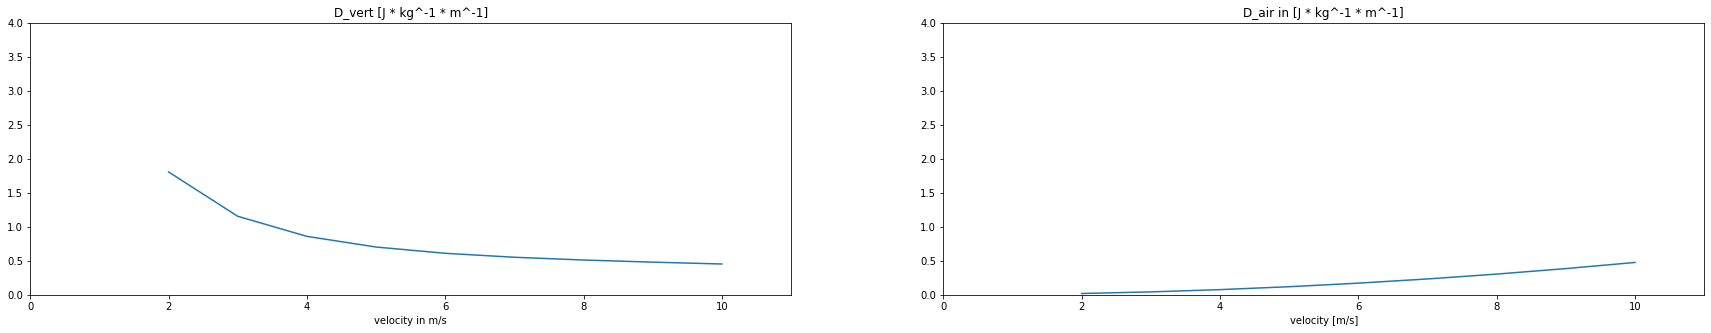

In [28]:
# Calculating Horizontal Work
#W_horz = np.cumsum(0.5 * (np.gradient(v_ex**2)))
W_horz = np.zeros(len(d))

# Calculating Vertical Work
#W_vert = abs(np.cumsum(2 * 9.81 * dh * f))
t_i = 10
W_vert =  (abs(2 * 9.81 * dh * f * t_i)) * 2    # multiplied by 2 according to eq. 14

# Calculating Air Work
## defining constants
p_0 = 1.293                                     # air density at sea level and 273 Kelvin
BP = 760                                        # atmospheric pressure at sea level
T = 23                                          # Temperature in °C
ht = 189                                        # Runners standing height in cm
M = 89.3                                        # Runners body mass in kg     
C_d = 1                                         # C_d = 1 in this approach, no further explanations           
t_i = 10                                        # time interval in s 

## Calculating air density and frontal area
p = (273 * p_0 * BP) / (760 * T)                   # calculating air density
A_p = 0.26 * (0.000949 * ht**0.655 * M**0.441)      # calculating runners frontal surface area -> they may give the wrong formula in the paper 0.000949 instead of 94.9


## Calculating Air Work
#W_air =np.cumsum(0.5 * p * A_p * v_ex**3 * C_d * t_i / M)
W_air =  ((0.5 * p * A_p * v_ex**3 * C_d * t_i) / M)  

# Converting Work to Power
P_air = W_air / t_i
P_vert = W_vert / t_i
P_horz = W_horz / t_i

# Converting Power to mechanical demand
D_air = P_air / v_ex
D_vert = P_vert / v_ex
D_horz = P_horz / v_ex

fig = plt.figure(figsize=(30, 5))
plt.subplot(1,2,1)
plt.plot(v_ex, D_vert)
plt.title("D_vert [J * kg^-1 * m^-1]")
plt.xlabel("velocity in m/s")
plt.ylim(0,4)
plt.xlim(0,11)

plt.subplot(1,2,2)
plt.plot(v_ex, D_air)
plt.title("D_air in [J * kg^-1 * m^-1]")
plt.xlabel("velocity [m/s]")
plt.ylim(0,4)
plt.xlim(0,11)


## Internal Work
The internal work is characterised by the movement of the bodies' segments in relation to bodies' COM. The following equation may be used to calculate the mechanical work done to swing the limbs per unit of distance traveled ($D_{limbs}~in~\frac{J}{kg * m}$):

$D_{limbs} = q * v^2 * f * (1+(\frac{d}{1-d})^2) $

where $q = 0.1$ is a constant factor that reflects the inertial properties of the limbs and mass partitioning between the limbs and the rest of the body. 

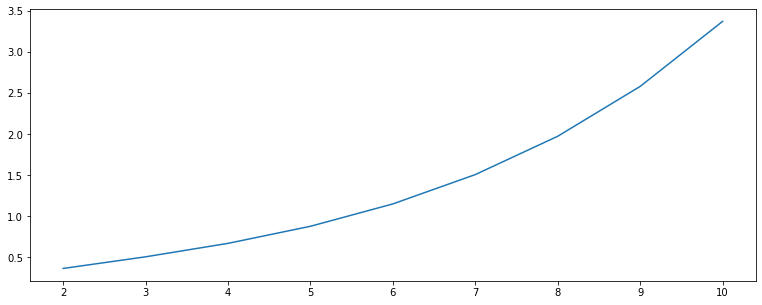

In [29]:
q = 0.1
dh = - 0.080 + 0.004 * v_ex
f = 0.026 * v_ex**2 - 0.111 * v_ex + 1.398
d = 0.004 * v_ex**2 - 0.061 * v_ex + 0.5

D_limbs = q * v_ex * f * (1+(d/(1-d))**2)                               # changed exponent from ^2 to ^1

fig = plt.figure(figsize=(13, 5))
plt.plot(v_ex, D_limbs)
plt.show()

W_limbs = (q * v_ex**2 * f * (1 + (d/(1-d))**2 ) * t_i)                 # exponent changed from ^3 to ^2
D_total = (W_vert + W_air + W_limbs + W_horz) / (t_i * v_ex)

The following plot displays the proportion of the mechanical demand of limbs, vertical oscillation of the COM and air resistance as a percentage of the overall mechanical demand. This example still displays constant speed running, therefore $W_{hor}$ is zero and consequently not included in the following graphic.

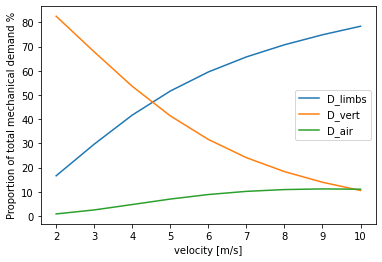

In [30]:
plt.xlabel('velocity [m/s]')
plt.ylabel('Proportion of total mechanical demand %')
plt.plot(v_ex, D_limbs/D_total*100, label='D_limbs')
plt.plot(v_ex, D_vert/D_total*100, label='D_vert')
plt.plot(v_ex, D_air/D_total*100, label='D_air')
plt.legend()

# Calculating Total Work during Intermittent Running Bouts


In the following a function is developed to model the mechanical work, power and demand of intermittend running bouts. Due to the change of velocities $W_{hor}$ is now included in the calculations. 

<ipython-input-52-82f5d897eec1>:48: RuntimeWarning: divide by zero encountered in true_divide
  D_vert = P_vert / v
<ipython-input-52-82f5d897eec1>:49: RuntimeWarning: divide by zero encountered in true_divide
  D_horz = P_horz / v
<ipython-input-52-82f5d897eec1>:50: RuntimeWarning: invalid value encountered in true_divide
  D_limbs = P_limbs / v
<ipython-input-52-82f5d897eec1>:51: RuntimeWarning: divide by zero encountered in true_divide
  D_total = P_total / v


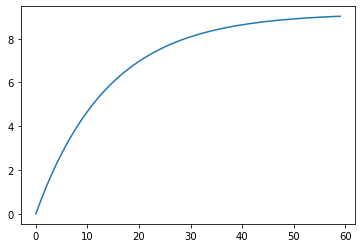

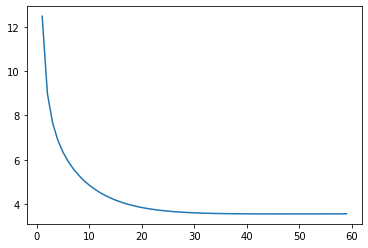

In [52]:
zeit_sprint = np.arange(0,6,0.1)
sprint = 9.16 * (1 - np.exp(-zeit_sprint/1.4))

def mechanical_power(v, s_f):                                                    # v in m/s and s_f in Hz
    
    t_i = 1 / s_f                                                                # converting sampling frequency into length of period
    # Oscillation COM, stride frequency and duty factor
    dh =  -0.080 + 0.004 * v                                                     # report different equation than in cited paper, -0.080 vs - 0.008
    f = 0.026 * v**2 - 0.111 * v + 1.398
    d = 0.004 * v**2 - 0.061 * v + 0.5

    # Calculating horizontal and vertical work
    W_horz = (abs(0.5 * (np.gradient(v**2))))
    W_vert = ((abs(2 * 9.81 * dh * f * t_i)) * 2) 

    # Calculating Air Work
    ## defining constants
    p_0 = 1.293                                     # air density at sea level and 273 Kelvin
    BP = 760                                        # atmospheric pressure at sea level
    T = 23                                          # Temperature in °C
    ht = 189                                        # Runners standing height in cm
    M = 89.3                                        # Runners body mass in kg     
    C_d = 1                                         # C_d = 1 in this approach, no further explanations           
                                   

    ## Calculating air density and frontal area
    p = (273 * p_0 * BP) / (760 * T)                    # calculating air density
    A_p = 0.26 * (0.000949 * ht**0.655 * M**0.441)      # calculating runners frontal surface area -> they may give the wrong formula in the paper 0.000949 instead of 94.9


    ## Calculating Air Work
    W_air =  ((0.5 * p * A_p * v**3 * C_d * t_i) / M)

    # Calculating internal Work
    W_limbs = (q * v**2 * f * (1 + (d/(1-d))**2 ) * t_i)     

    # Calculating Total Work
    W_total = W_vert + W_horz + W_limbs + W_air


    #Calculating Power for segments and total
    P_vert = W_vert / t_i 
    P_horz = W_horz / t_i
    P_limbs = W_limbs / t_i
    P_total = W_total / t_i

    # Calculating mechanical demand for segments and total
    D_vert = P_vert / v
    D_horz = P_horz / v
    D_limbs = P_limbs / v
    D_total = P_total / v

    W = np.array([W_vert, W_horz, W_limbs, W_total])
    P = np.array([P_vert, P_horz, P_limbs, P_total])
    D = np.array([D_vert, D_horz, D_limbs, D_total])

    return W, P, D

W, P, D = mechanical_power(sprint, 10)
plt.plot(sprint)
plt.show()
plt.plot(D[3])

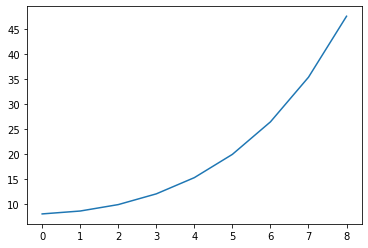

In [141]:
plt.plot(P_total)